## Load Modules

In [1]:
using MLJ
using MultivariateStats
using ScikitLearn
using Plots; gr()
using CSV
using DataFrames
using StatsBase
using Clustering: randindex, silhouettes, varinfo, vmeasure, mutualinfo
using LinearAlgebra: diag
using GaussianMixtures: GMM

In [2]:
ENV["LINES"] = 100;

In [3]:
RNG = 33;

## Import Data and Set Up

In [4]:
data = CSV.read("biodegradation.csv")
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,1,4.78264,2.0,4.828,6.496,,,Float64
2,2,3.06951,0.8039,3.0463,9.1775,,,Float64
3,3,0.716588,0,0.0,12,,,Int64
4,4,0.042654,0,0.0,3,,,Int64
5,5,0.980095,0,0.0,36,,,Int64
6,6,0.290047,0,0.0,13,,,Int64
7,7,1.64645,0,1.0,18,,,Int64
8,8,37.0556,0.0,37.5,60.7,,,Float64
9,9,1.3763,0,1.0,24,,,Int64


In [5]:
label_counts = countmap(data[:(Class)])
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

2-element Array{Float64,1}:
 0.33744075829383885
 0.6625592417061611

In [6]:
coerce!(data, :Class=>Multiclass)
schema(data)

┌─────────┬─────────────────────────────────┬───────────────┐
│ _.names │ _.types                         │ _.scitypes    │
├─────────┼─────────────────────────────────┼───────────────┤
│ 1       │ Float64                         │ Continuous    │
│ 2       │ Float64                         │ Continuous    │
│ 3       │ Int64                           │ Count         │
│ 4       │ Int64                           │ Count         │
│ 5       │ Int64                           │ Count         │
│ 6       │ Int64                           │ Count         │
│ 7       │ Int64                           │ Count         │
│ 8       │ Float64                         │ Continuous    │
│ 9       │ Int64                           │ Count         │
│ 10      │ Int64                           │ Count         │
│ 11      │ Int64                           │ Count         │
│ 12      │ Float64                         │ Continuous    │
│ 13      │ Float64                         │ Continuous    │
│ 14    

In [63]:
# y, X = unpack(data, ==(:Class), colname->true)
y, X = unpack(data, ==(:Class), x->scitype(x)==:Continuous) 
train, test = partition(eachindex(y), 0.7, shuffle=true, rng=123, stratify=values(data[:Class])) # gives 70:30 split

LoadError: Empty column selection encountered at selection 2
selection 1: [:Class]
 remaining: [Symbol("1"), Symbol("2"), Symbol("3"), Symbol("4"), Symbol("5"), Symbol("6"), Symbol("7"), Symbol("8"), Symbol("9"), Symbol("10"), Symbol("11"), Symbol("12"), Symbol("13"), Symbol("14"), Symbol("15"), Symbol("16"), Symbol("17"), Symbol("18"), Symbol("19"), Symbol("20"), Symbol("21"), Symbol("22"), Symbol("23"), Symbol("24"), Symbol("25"), Symbol("26"), Symbol("27"), Symbol("28"), Symbol("29"), Symbol("30"), Symbol("31"), Symbol("32"), Symbol("33"), Symbol("34"), Symbol("35"), Symbol("36"), Symbol("37"), Symbol("38"), Symbol("39"), Symbol("40"), Symbol("41")]
selection 2: Symbol[]
 remaining: [Symbol("1"), Symbol("2"), Symbol("3"), Symbol("4"), Symbol("5"), Symbol("6"), Symbol("7"), Symbol("8"), Symbol("9"), Symbol("10"), Symbol("11"), Symbol("12"), Symbol("13"), Symbol("14"), Symbol("15"), Symbol("16"), Symbol("17"), Symbol("18"), Symbol("19"), Symbol("20"), Symbol("21"), Symbol("22"), Symbol("23"), Symbol("24"), Symbol("25"), Symbol("26"), Symbol("27"), Symbol("28"), Symbol("29"), Symbol("30"), Symbol("31"), Symbol("32"), Symbol("33"), Symbol("34"), Symbol("35"), Symbol("36"), Symbol("37"), Symbol("38"), Symbol("39"), Symbol("40"), Symbol("41")]


In [62]:
X

,1,2,3,4,5,6,7,8,9,10,11
,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Float64,Int64,Int64,Int64
1,3.919,2.6909,0,0,0,0,0,31.4,2,0,0
2,4.17,2.1144,0,0,0,0,0,30.8,1,1,0
3,3.932,3.2512,0,0,0,0,0,26.7,2,4,0
4,3.0,2.7098,0,0,0,0,0,20.0,0,2,0
5,4.236,3.3944,0,0,0,0,0,29.4,2,4,0
6,4.236,3.4286,0,0,0,0,0,28.6,2,4,0
7,5.0,5.0476,1,0,0,0,0,11.1,0,3,0
8,4.525,3.8301,0,0,0,0,0,31.6,3,2,0
9,4.596,3.0777,0,0,0,0,2,44.4,2,0,0


#### Confirming that data was stratified correctly

In [8]:
train_counts = countmap(data[train,:Class])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

2-element Array{Float64,1}:
 0.33739837398373984
 0.6626016260162602

In [9]:
test_counts = countmap(data[test,:Class])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

2-element Array{Float64,1}:
 0.33753943217665616
 0.6624605678233438

#### Standardizing data pre-clustering

In [36]:
standardizer = Standardizer(count=true)
stand = machine(standardizer, X[train,:]) #only want to standardize on training distribution
MLJ.fit!(stand)
X_stand = MLJ.transform(stand, X);

┌ Info: Training Machine{Standardizer} @ 1…39.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/8HOpr/src/machines.jl:187


## Set up model

In [37]:
task(model) = !model.is_supervised
models(task)

26-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AffinityPropagation, package_name = ScikitLearn, ... )
 (name = AgglomerativeClustering, package_name = ScikitLearn, ... )
 (name = Birch, package_name = ScikitLearn, ... )
 (name = ContinuousEncoder, package_name = MLJModels, ... )
 (name = DBSCAN, package_name = ScikitLearn, ... )
 (name = FeatureAgglomeration, package_name = ScikitLearn, ... )
 (name = FeatureSelector, package_name = MLJModels, ... )
 (name = FillImputer, package_name = MLJModels, ... )
 (name = ICA, package_name = MultivariateStats, ... )
 (name = KMeans, package_name = Clustering, ... )
 (name = KMeans, package_name = ParallelKMean

# Clustering Algorithms
Run the clustering algorithms on the datasets and describe what you see.

### KMeans

In [38]:
@load KMeans pkg=ParallelKMeans
# @load KMeans pkg=Clustering

┌ Info: A model type "KMeans" is already loaded. 
│ No new code loaded. 
└ @ MLJModels /home/andrew/.julia/packages/MLJModels/hCHWW/src/loading.jl:43


KMeans(
    algo = ParallelKMeans.Hamerly(),
    k_init = "k-means++",
    k = 3,
    tol = 1.0e-6,
    max_iters = 300,
    copy = true,
    threads = 4,
    rng = Random._GLOBAL_RNG(),
    weights = nothing,
    init = nothing) @ 5…96

In [39]:
# https://stackoverflow.com/questions/51181392/julia-vs-matlab-distance-matrix-run-time-test
function dist_mat(X::Matrix)
    G = X * X'
    dG = diag(G)
    return sqrt.(dG .+ dG' .- 2 .* G)
end

dist_mat (generic function with 1 method)

In [40]:
upper = 10
k_range = 2:upper
total_costs = []
sils = []
ls = []

for i in k_range
    println("K = $i")
    model = ParallelKMeans.KMeans(k=i, rng=RNG)
    mach = machine(model, X_stand[train,:]) |> MLJ.fit!
    
#     @show report(mach) 
#     @show fitted_params(mach)
    @show mach.report.totalcost # https://github.com/PyDataBlog/ParallelKMeans.jl/blob/87ce07d10796078aacffcbea0b2e9dc0c02f25d7/src/hamerly.jl#L65
    d = countmap(mach.report.assignments)
    
    k = d |> keys
    v = d |> values
    l = sort(collect(zip(k,v)), by=x->x[1])
    @show l
    
    # https://juliastats.org/Clustering.jl/stable/validate.html
    s = silhouettes(mach.report.assignments, dist_mat(convert(Matrix,X_stand[train,:])))
    println("silhouette: $(mean(s))")
    
    push!(ls, l)
    push!(total_costs, mach.report.totalcost) 
    push!(sils, mean(s))
    println("")
end

K = 2
Iteration 1: Jclust = 50819.89901353828
Iteration 2: Jclust = 28731.120948900694
Iteration 3: Jclust = 29480.068464282896
Iteration 4: Jclust = 28597.617922666923
Iteration 5: Jclust = 28429.2509134836
Iteration 6: Jclust = 28333.353263716454
Iteration 7: Jclust = 28584.943719878374
Iteration 8: Jclust = 28634.409028416
Iteration 9: Jclust = 28796.645506334047
Iteration 10: Jclust = 28511.064531933545
Iteration 11: Jclust = 28585.666099936654
Iteration 12: Jclust = 28571.330577571032
Iteration 13: Jclust = 28628.362556409244
Iteration 14: Jclust = 28696.118878103654
Iteration 15: Jclust = 28719.40828339257
Iteration 16: Jclust = 28719.40828339257
Successfully terminated with convergence.
mach.report.totalcost = 27074.573254372182
l = 

┌ Info: Training Machine{KMeans} @ 5…92.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/8HOpr/src/machines.jl:187


[(1, 284), (2, 454)]
silhouette: 0.17270289035420278

K = 3
Iteration 1: Jclust = 44868.20905188187
Iteration 2: Jclust = 26748.459276365553
Iteration 3: Jclust = 28056.265807929143
Iteration 4: Jclust = 26212.8009386914
Iteration 5: Jclust = 26537.77555216359
Iteration 6: Jclust = 26471.957715721263
Iteration 7: Jclust = 26461.190761969243
Iteration 8: Jclust = 26554.614858762958
Iteration 9: Jclust = 26240.893976432886
Iteration 10: Jclust = 26005.01983224487
Iteration 11: Jclust = 26108.574514393753
Iteration 12: Jclust = 26203.692426199334
Iteration 13: Jclust = 26239.09522087058
Iteration 14: Jclust = 26327.815881624163
Iteration 15: Jclust = 26352.72179240991
Iteration 16: Jclust = 26366.118791781315
Iteration 17: Jclust = 26258.15113668832
Iteration 18: Jclust = 26310.34300004722
Iteration 19: Jclust = 26249.53487093216
Iteration 20: Jclust = 26176.470130708636
Iteration 21: Jclust = 26163.54388589967
Iteration 22: Jclust = 26209.619434925662
Iteration 23: Jclust = 26282.0108613

┌ Info: Training Machine{KMeans} @ 8…01.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/8HOpr/src/machines.jl:187
┌ Info: Training Machine{KMeans} @ 5…60.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/8HOpr/src/machines.jl:187
┌ Info: Training Machine{KMeans} @ 1…05.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/8HOpr/src/machines.jl:187


silhouette: 0.11589815163818418

K = 6
Iteration 1: Jclust = 31908.81427797507
Iteration 2: Jclust = 22224.004662130737
Iteration 3: Jclust = 21725.364081090265
Iteration 4: Jclust = 21930.00619475393
Iteration 5: Jclust = 21451.294489034426
Iteration 6: Jclust = 21731.47975117297
Iteration 7: Jclust = 21949.928698495663
Iteration 8: Jclust = 21833.094662408497
Iteration 9: Jclust = 21428.380143493436
Iteration 10: Jclust = 21476.59940905719
Iteration 11: Jclust = 21523.14948621533
Iteration 12: Jclust = 21572.272880639714
Iteration 13: Jclust = 21572.272880639714
Successfully terminated with convergence.
mach.report.totalcost = 21032.532904211796
l = [(1, 68), (2, 178), (3, 120), (4, 20), (5, 34), (6, 318)]
silhouette: 0.11978384212897206

K = 7
Iteration 1: Jclust = 29675.060590332978
Iteration 2: Jclust = 21970.99840463651
Iteration 3: Jclust = 21559.199007739244
Iteration 4: Jclust = 20974.180762771408
Iteration 5: Jclust = 20757.70884111616
Iteration 6: Jclust = 20746.778634865244

┌ Info: Training Machine{KMeans} @ 1…21.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/8HOpr/src/machines.jl:187
┌ Info: Training Machine{KMeans} @ 2…39.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/8HOpr/src/machines.jl:187
┌ Info: Training Machine{KMeans} @ 1…84.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/8HOpr/src/machines.jl:187
┌ Info: Training Machine{KMeans} @ 1…25.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/8HOpr/src/machines.jl:187
┌ Info: Training Machine{KMeans} @ 1…95.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/8HOpr/src/machines.jl:187


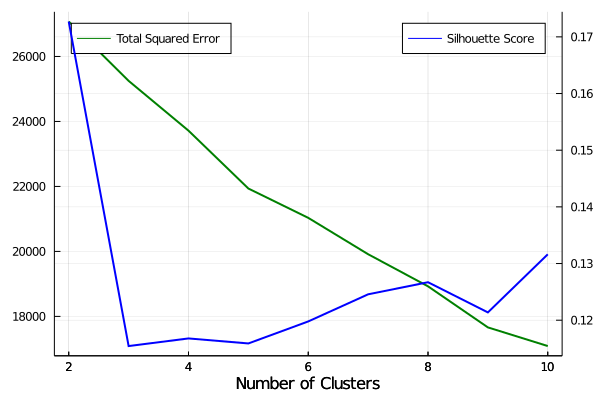

In [41]:
plot(k_range, total_costs, legend=:topleft, label="Total Squared Error", color=:green, lw=2)
plot!(twinx(),k_range, sils, legend=:topright, label="Silhouette Score", color=:blue, lw=2)
xlabel!("Number of Clusters")

In [42]:
savefig("figures/bio_kmeans_metrics_$upper")

In [43]:
function prepare_portfolio(ls)
    N = size(ls)[1]
    D = size(ls[end])[1]
    mat = zeros(N, D)
    for i in 1:N
#         print("\n")
#         @show i
        for j in 1:size(ls[i])[1]
#             @show j
            mat[i,j] = ls[i][j][2]
        end
    end
    return mat
end

prepare_portfolio (generic function with 1 method)

In [44]:
function cum_columns(mat; normalize=false)
    mat2 = deepcopy(mat)
    normalize && (mat2 ./= sum(mat2, dims = 2)) # if you want to normalize each row
    for i in 2:size(mat2)[2]
       mat2[:,i] = mat2[:,i-1] + mat2[:,i]
    end
    return mat2'
end

cum_columns (generic function with 1 method)

In [45]:
function cum_plot(mat)
    N = size(mat)[2]
    p = plot(legend=:outertopright, palette=palette(:Accent_8))
    for i in N+1:-1:1
        plot!(1:N, mat[i,:], label="Cluster $(i)", fill=0, α=1)
    end
    xticks!(collect(1:N),string.(collect(2:N+1)))
    ylabel!("Cluster Proportion")
    xlabel!("Number of Clusters")
    display(p)
end

cum_plot (generic function with 1 method)

In [46]:
# plotattr(:Series)
plotattr("fillrange")

fillrange {Number or AbstractVector}
fill_between, fillbetween, fillranges, fillrng, fillto, frange

Fills area between fillrange and y for line-types, sets the base for bar/stick types, and similar for other types.
Series attribute,  default: nothing


In [47]:
mat = prepare_portfolio(ls)
plotmat = cum_columns(mat, normalize=true)

10×9 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.384824  0.238482  0.224932  0.176152  …  0.0840108  0.0677507  0.0907859
 1.0       0.680217  0.653117  0.47561      0.281843   0.116531   0.140921
 1.0       1.0       0.974255  0.922764     0.434959   0.132791   0.157182
 1.0       1.0       1.0       0.95122      0.46477    0.163957   0.174797
 1.0       1.0       1.0       1.0          0.51084    0.210027   0.220867
 1.0       1.0       1.0       1.0       …  0.624661   0.452575   0.288618
 1.0       1.0       1.0       1.0          0.998645   0.800813   0.651762
 1.0       1.0       1.0       1.0          1.0        0.802168   0.653117
 1.0       1.0       1.0       1.0          1.0        1.0        0.853659
 1.0       1.0       1.0       1.0          1.0        1.0        1.0

#### Explanation
For the plot, the area below each line indicates the proportion of the instances that are contained in that cluster. X-axis is number of clusters in that Kmeans run. So for 2 means, there are 2 clusters. For 5 means, there is a large cluster 1, a large cluster 4, and a large cluster 5. Up to runs as large as 6 clusters, there are really only 3 prevalent clusters. Farther than that, it becomes more fragmented. 3 clusters

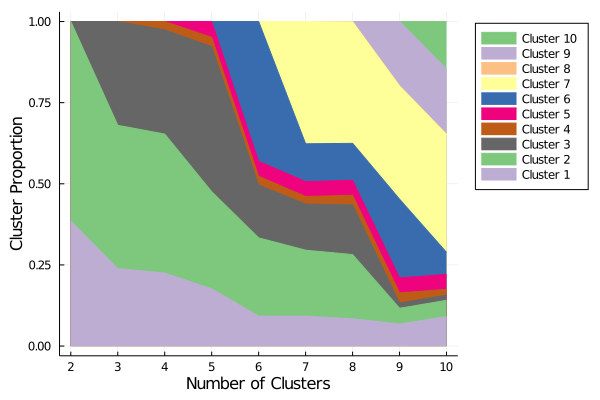

In [48]:
cum_plot(plotmat)

In [49]:
savefig("figures/bio_kmeans_portfolio_$upper")

### Expectation Maximization

In [57]:
X_stand[train,:]

,1,2,3,4,5,6,7
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.29887,-0.778063,0.851534,-0.179687,-0.415591,-0.279405,1.85834
2,1.08032,0.77449,0.851534,-0.179687,0.401203,-0.279405,0.993341
3,-1.15899,-0.148551,-0.499933,-0.179687,-0.415591,-0.279405,-0.736655
4,1.48027,2.44602,0.175801,-0.179687,-0.415591,-0.279405,-0.736655
5,0.0795461,-0.125726,-0.499933,-0.179687,-0.415591,-0.279405,0.128343
6,1.36784,0.755805,2.203,-0.179687,1.218,0.628969,-0.304156
7,1.08217,1.21916,-0.499933,-0.179687,3.25999,0.628969,0.993341
8,-2.55234,-1.09382,0.851534,-0.179687,-0.415591,-0.279405,-0.736655
9,0.00582385,-0.467269,0.175801,-0.179687,0.401203,-0.279405,0.128343


In [55]:
gmm = ScikitLearn.fit!(GMM(n_components=3, kind=:diag), # number of components, diagonal covariance matrix (other option: :full)
                       convert(Matrix,X_stand[train,:]))

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       5.089601e+04
      1       2.656718e+04      -2.432883e+04 |        3
      2       2.642243e+04      -1.447513e+02 |        2
      3       2.635124e+04      -7.118839e+01 |        2
      4       2.629992e+04      -5.132398e+01 |        2
      5       2.625725e+04      -4.267430e+01 |        2
      6       2.623018e+04      -2.706987e+01 |        2
      7       2.620731e+04      -2.286158e+01 |        2
      8       2.620368e+04      -3.631992e+00 |        2
      9       2.620289e+04      -7.882972e-01 |        2
     10       2.620263e+04      -2.587186e-01 |        0
     11       2.620263e+04       0.000000e+00 |        0
K-means converged with 11 iterations (objv = 26202.634717456313)


┌ Info: Initializing GMM, 3 Gaussians diag covariance 41 dimensions using 738 data points
└ @ GaussianMixtures /home/andrew/.julia/packages/GaussianMixtures/bTNkf/src/train.jl:78
┌ Info: K-means with 738 data points using 11 iterations
│ 5.9 data points per parameter
└ @ GaussianMixtures /home/andrew/.julia/packages/GaussianMixtures/bTNkf/src/train.jl:139
┌ Warning: 246 pathological elements normalized
└ @ GaussianMixtures /home/andrew/.julia/packages/GaussianMixtures/bTNkf/src/train.jl:68
┌ Warning: 246 pathological elements normalized
└ @ GaussianMixtures /home/andrew/.julia/packages/GaussianMixtures/bTNkf/src/train.jl:68
┌ Warning: 246 pathological elements normalized
└ @ GaussianMixtures /home/andrew/.julia/packages/GaussianMixtures/bTNkf/src/train.jl:68
┌ Warning: 246 pathological elements normalized
└ @ GaussianMixtures /home/andrew/.julia/packages/GaussianMixtures/bTNkf/src/train.jl:68
┌ Warning: 246 pathological elements normalized
└ @ GaussianMixtures /home/andrew/.julia/packa

GMM{Float64} with 3 components in 41 dimensions and diag covariance
Mix 1: weight NaN
  mean: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  variance: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mix 2: weight NaN
  mean: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  variance: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mix 3: weight NaN
  mean: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  variance: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


# Dimensionality Reduction
Apply the dimensionality reduction algorithms to the two datasets and describe what you see.


### PCA

### ICA

### Randomized Projections

### Classical Multidimensional Scaling

# Clustering Pt 2
Reproduce your clustering experiments, but on the data after you've run dimensionality reduction on it. Yes, that’s 16 combinations of datasets, dimensionality reduction, and clustering method. You should look at all of them, but focus on the more interesting findings in your report.

### Kmeans - PCA

### EM - PCA

### Kmeans - ICA

### EM - ICA

### Kmeans - Randomized Projections

### EM - Randomized Projections

### Kmeans - Classical Multidimensional Scaling

### EM - Classical Multidimensional Scaling

# BELOW ONLY FOR 1 DATASET

### Dimensionality Reduction + NN 
Apply the dimensionality reduction algorithms to one of your datasets from assignment #1. (if you've reused the datasets from assignment #1 to do experiments 1-3 above then you've already done this) and rerun your neural network learner on the newly projected data.

### Clustering + NN
Apply the clustering algorithms to the same dataset to which you just applied the dimensionality reduction algorithms (you've probably already done this), treating the clusters as if they were new features. In other words, treat the clustering algorithms as if they were dimensionality reduction algorithms. Again, rerun your neural network learner on the newly projected data.

In [ ]:
###

## Dimensionality Reduction + NN - Apply the dimensionality reduction algorithms to one of your datasets from assignment #1 
#  (if you've reused the datasets from assignment #1 to do experiments 1-3 above then you've already done this) 
#  and rerun your neural network learner on the newly projected data.


## Clustering + NN - Apply the clustering algorithms to the same dataset to which you just applied the dimensionality 
#  reduction algorithms (you've probably already done this), treating the clusters as if they were new features. 
#  In other words, treat the clustering algorithms as if they were dimensionality reduction algorithms. 
#  Again, rerun your neural network learner on the newly projected data.
